In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv(r"C:\Users\Karan\Desktop\Test_ML\diabetes.csv")
print(df.head())
print(df.shape)
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

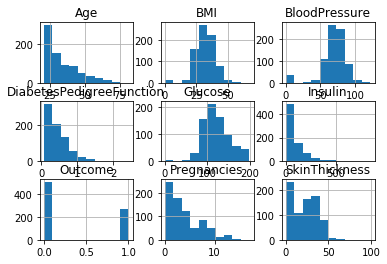

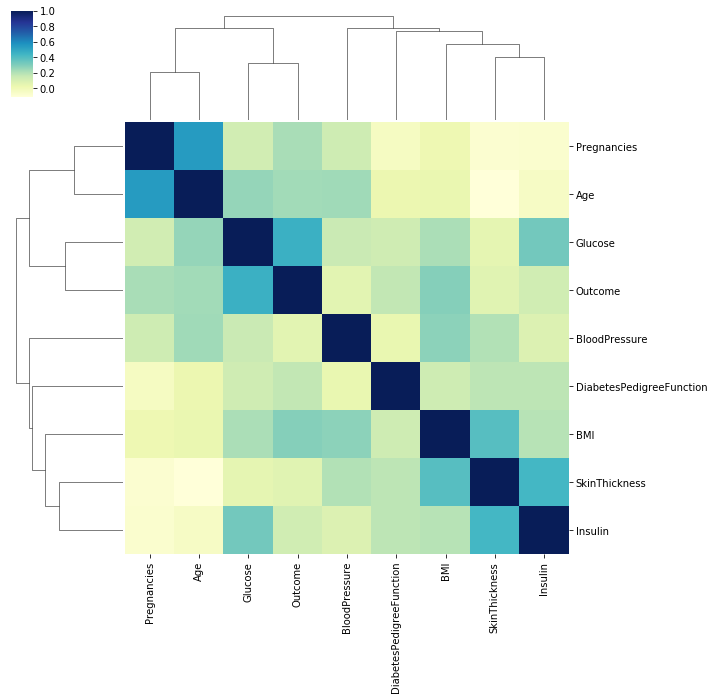

In [3]:
# histograms
df.hist()
sns.clustermap(df.corr(), cmap='YlGnBu')

In [4]:
# Split-out validation dataset
array=df.values
X=array[:,[0,1,2,3,4,5,6]]
Y=array[:,8]
validation_size = 0.1
seed = 7
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)


In [5]:
scoring='accuracy'
#Checking Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model nhmn
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.735580 (0.066769)
LDA: 0.738840 (0.062346)
KNN: 0.724957 (0.086185)
CART: 0.724860 (0.058979)
NB: 0.716764 (0.061402)
SVM: 0.708816 (0.109084)


In [12]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

AttributeError: 'numpy.ndarray' object has no attribute 'len'

In [7]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8441558441558441
[[38  8]
 [ 4 27]]
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86        46
         1.0       0.77      0.87      0.82        31

    accuracy                           0.84        77
   macro avg       0.84      0.85      0.84        77
weighted avg       0.85      0.84      0.85        77



In [8]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print('accuracy :',accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy : 0.8311688311688312
[[39  7]
 [ 6 25]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        46
         1.0       0.78      0.81      0.79        31

    accuracy                           0.83        77
   macro avg       0.82      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77



In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8311688311688312
[[39  7]
 [ 6 25]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        46
         1.0       0.78      0.81      0.79        31

    accuracy                           0.83        77
   macro avg       0.82      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77

